In [424]:
#Modules Needed
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import webcolors

In [425]:
import os
os.getcwd()

'/Users/spai/Desktop/Blog/code'

# Read an image

In [493]:

# img = cv2.imread('../Data/red.jpg',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/red_yellow.png',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/red_bra.jpg',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/red_bra_model.jpg',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/body_color.jpg',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/body_color_solo.jpg',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/pic_1.png',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/human_trails.jpeg',cv2.IMREAD_UNCHANGED)
# img = cv2.imread('../Data/statue.png',cv2.IMREAD_UNCHANGED)
img = cv2.imread('../Data/PINK_BRA.png',cv2.IMREAD_UNCHANGED)

h,w,p = img.shape
print(f'Height: {h} width: {w} Total pixles :{h*w}')


cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Height: 1070 width: 806 Total pixles :862420


# Resize an Image

In [494]:
# percent of original size
scale_percent = 80
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
h,w,p = resized.shape
print(f'Height: {h} width: {w} Total pixles :{h*w}')

 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Height: 856 width: 644 Total pixles :551264


# Histogram of an Image

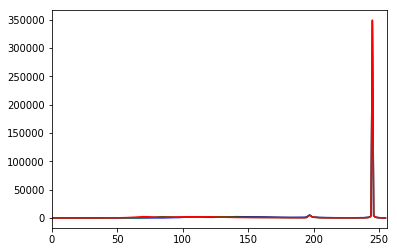

In [495]:

img = resized
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [496]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting in 3D space

In [497]:
# r, g, b = cv2.split(img)
# r = r.flatten()
# g = g.flatten()
# b = b.flatten()
# #plotting 
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(r, g, b)
# plt.show()

In [498]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


In [499]:
vectorized

array([[245., 245., 245.],
       [245., 245., 245.],
       [245., 245., 245.],
       ...,
       [245., 245., 245.],
       [245., 245., 245.],
       [245., 245., 245.]], dtype=float32)

In [500]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [516]:
K =50
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [517]:
center = np.uint8(center)


In [518]:
center

array([[245, 245, 245],
       [ 76,  91, 116],
       [159, 168, 185],
       [108, 123, 148],
       [197, 197, 197],
       [135, 149, 171],
       [ 57,  71,  93],
       [122, 136, 160],
       [ 89, 103, 129],
       [216, 216, 216],
       [ 66,  81, 104],
       [177, 186, 203],
       [108, 120, 141],
       [169, 179, 197],
       [ 98, 109, 130],
       [ 93, 108, 135],
       [117, 132, 157],
       [150, 160, 177],
       [208, 208, 209],
       [239, 240, 240],
       [185, 193, 207],
       [ 41,  54,  72],
       [113, 125, 144],
       [223, 225, 227],
       [170, 176, 186],
       [ 70,  85, 108],
       [ 83,  98, 124],
       [152, 163, 184],
       [103, 118, 144],
       [135, 146, 164],
       [128, 142, 166],
       [103, 115, 136],
       [120, 132, 151],
       [ 74,  88, 112],
       [143, 154, 174],
       [ 51,  64,  85],
       [231, 233, 234],
       [ 98, 113, 139],
       [177, 183, 195],
       [ 62,  76,  99],
       [201, 201, 202],
       [195, 195

In [519]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

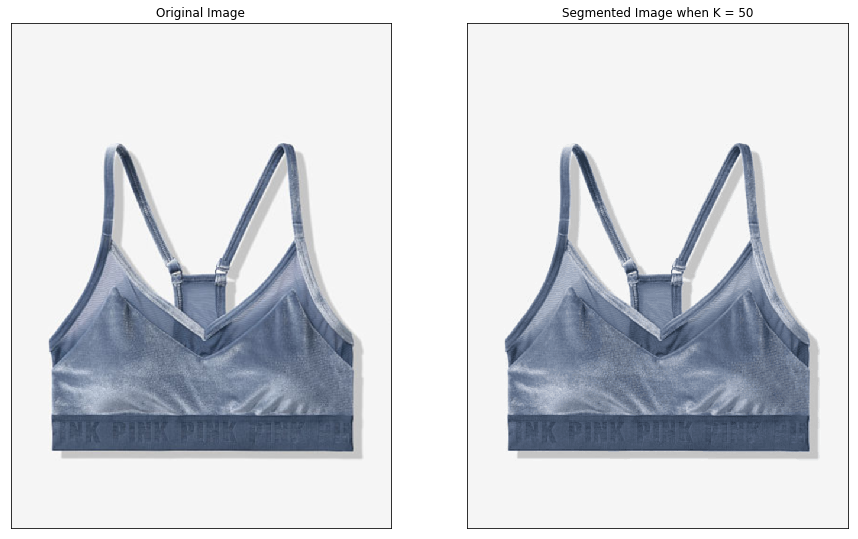

In [520]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [225]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [226]:
center

array([[249, 249, 249],
       [153,  95,  75],
       [217, 159, 130],
       [ 51,  33,  28],
       [189, 129, 104],
       [221, 214, 211]], dtype=uint8)

In [491]:
webcolors.rgb_to_name(tuple([245,255,255]))


ValueError: '#f5ffff' has no defined color name in css3.


The following command must be run outside of the IPython shell:

    $ pip install webcolors==1.3

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [230]:
cv2.imshow()

TypeError: Required argument 'mat' (pos 2) not found

In [235]:
cv2.imshow('image',[[center]])
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: Expected Ptr<cv::UMat> for argument '%s'